In [913]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor,HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt

In [845]:
df = pd.read_csv('calidad-aire.csv')

df

,FECHA,HORA,CO_CENTENARIO,NO2_CENTENARIO,PM10_CENTENARIO,CO_CORDOBA,NO2_CORDOBA,PM10_CORDOBA,CO_LA_BOCA,NO2_LA_BOCA,PM10_LA_BOCA,CO_PALERMO,NO2_PALERMO,PM10_PALERMO
0,21NOV2009:00:00:00,8,0.39,17,NaN,s/d,20,NaN,s/d,18,NaN,0.56,NaN,NaN
1,21NOV2009:00:00:00,15,0.68,15,NaN,s/d,20,NaN,s/d,16,NaN,1.04,NaN,NaN
2,21NOV2009:00:00:00,21,0.81,20,NaN,s/d,18,NaN,s/d,23,NaN,1.16,NaN,NaN
3,21NOV2009:00:00:00,22,0.85,21,NaN,s/d,18,NaN,s/d,18,NaN,1.16,NaN,NaN
4,21NOV2009:00:00:00,24,0.93,22,NaN,s/d,15,NaN,s/d,25,NaN,1.16,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113622,26NOV2009:00:00:00,9,0.69,41,NaN,s/d,s/d,NaN,s/d,19,NaN,0.41,NaN,NaN
113623,18MAY2019:00:00:00,3,0.56,7,17,0.51,8,20,0.24,6,32,NaN,NaN,NaN
113624,03DEC2014:00:00:00,9,0.68,20,35,0.39,22,s/d,s/d,s/d,s/d,NaN,NaN,NaN
113625,03FEB2019:00:00:00,8,0.13,6,33,0.30,33,29,0.28,3,s/d,NaN,NaN,NaN


In [846]:
df['FECHA'].value_counts()

31MAY2019:00:00:00    49
01JUN2019:00:00:00    48
21DEC2021:00:00:00    41
20APR2012:00:00:00    38
22DEC2021:00:00:00    38
                      ..
25MAY2020:00:00:00    12
12FEB2010:00:00:00    12
17SEP2021:00:00:00    12
01OCT2009:00:00:00    11
01FEB2016:00:00:00     1
Name: FECHA, Length: 4770, dtype: int64

In [847]:
df.isnull().sum()

FECHA                   0
HORA                    0
CO_CENTENARIO         242
NO2_CENTENARIO        241
PM10_CENTENARIO     10548
CO_CORDOBA            242
NO2_CORDOBA           241
PM10_CORDOBA        10548
CO_LA_BOCA            239
NO2_LA_BOCA           241
PM10_LA_BOCA        10545
CO_PALERMO         107623
NO2_PALERMO        113627
PM10_PALERMO       113627
dtype: int64

In [848]:
df[df.duplicated()]

,FECHA,HORA,CO_CENTENARIO,NO2_CENTENARIO,PM10_CENTENARIO,CO_CORDOBA,NO2_CORDOBA,PM10_CORDOBA,CO_LA_BOCA,NO2_LA_BOCA,PM10_LA_BOCA,CO_PALERMO,NO2_PALERMO,PM10_PALERMO


In [849]:
df.dtypes

FECHA               object
HORA                 int64
CO_CENTENARIO       object
NO2_CENTENARIO      object
PM10_CENTENARIO     object
CO_CORDOBA          object
NO2_CORDOBA         object
PM10_CORDOBA        object
CO_LA_BOCA          object
NO2_LA_BOCA         object
PM10_LA_BOCA        object
CO_PALERMO          object
NO2_PALERMO        float64
PM10_PALERMO       float64
dtype: object

In [850]:
df['fecha_prep'] = df['FECHA'].str[:9]

df['fecha_prep']

0         21NOV2009
1         21NOV2009
2         21NOV2009
3         21NOV2009
4         21NOV2009
            ...    
113622    26NOV2009
113623    18MAY2019
113624    03DEC2014
113625    03FEB2019
113626    10OCT2018
Name: fecha_prep, Length: 113627, dtype: object

In [851]:
df['year'] = df['fecha_prep'].str[5:]

df['year']

0         2009
1         2009
2         2009
3         2009
4         2009
          ... 
113622    2009
113623    2019
113624    2014
113625    2019
113626    2018
Name: year, Length: 113627, dtype: object

In [852]:
df['mes']= df['fecha_prep'].str[2:5]

df['mes']

0         NOV
1         NOV
2         NOV
3         NOV
4         NOV
         ... 
113622    NOV
113623    MAY
113624    DEC
113625    FEB
113626    OCT
Name: mes, Length: 113627, dtype: object

In [853]:
df['dia'] = df['fecha_prep'].str[:2]

df['dia']

0         21
1         21
2         21
3         21
4         21
          ..
113622    26
113623    18
113624    03
113625    03
113626    10
Name: dia, Length: 113627, dtype: object

In [854]:
df_centenario = df[['FECHA','CO_CENTENARIO','NO2_CENTENARIO']]
#Columns with null values
df_centenario.isnull().sum()

FECHA               0
CO_CENTENARIO     242
NO2_CENTENARIO    241
dtype: int64

In [855]:
df_centenario.shape

(113627, 3)

In [856]:
#Total of null values
df_centenario.isnull().sum().sum()

483

In [857]:
df_centenario[df_centenario.isnull().any(axis=1)]

,FECHA,CO_CENTENARIO,NO2_CENTENARIO
271,18JAN2010:00:00:00,NaN,NaN
1031,19JAN2011:00:00:00,NaN,NaN
1313,09OCT2010:00:00:00,NaN,NaN
2277,19APR2012:00:00:00,NaN,NaN
2278,19APR2012:00:00:00,NaN,NaN
...,...,...,...
112099,01OCT2018:00:00:00,NaN,NaN
113060,31MAY2019:00:00:00,NaN,NaN
113436,01JUN2019:00:00:00,NaN,NaN
113528,29JAN2020:00:00:00,NaN,NaN


In [858]:
index =df_centenario[df_centenario.isnull().any(axis=1)].index

In [859]:
df_centenario.drop(index)

,FECHA,CO_CENTENARIO,NO2_CENTENARIO
0,21NOV2009:00:00:00,0.39,17
1,21NOV2009:00:00:00,0.68,15
2,21NOV2009:00:00:00,0.81,20
3,21NOV2009:00:00:00,0.85,21
4,21NOV2009:00:00:00,0.93,22
...,...,...,...
113622,26NOV2009:00:00:00,0.69,41
113623,18MAY2019:00:00:00,0.56,7
113624,03DEC2014:00:00:00,0.68,20
113625,03FEB2019:00:00:00,0.13,6


In [860]:
#df_centenario['fecha_'] =df_centenario['FECHA'].str[:9]

df_centenario.loc[:,'Fecha'] = df_centenario['FECHA'].str[:9]

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [861]:
df_centenario

,FECHA,CO_CENTENARIO,NO2_CENTENARIO,Fecha
0,21NOV2009:00:00:00,0.39,17,21NOV2009
1,21NOV2009:00:00:00,0.68,15,21NOV2009
2,21NOV2009:00:00:00,0.81,20,21NOV2009
3,21NOV2009:00:00:00,0.85,21,21NOV2009
4,21NOV2009:00:00:00,0.93,22,21NOV2009
...,...,...,...,...
113622,26NOV2009:00:00:00,0.69,41,26NOV2009
113623,18MAY2019:00:00:00,0.56,7,18MAY2019
113624,03DEC2014:00:00:00,0.68,20,03DEC2014
113625,03FEB2019:00:00:00,0.13,6,03FEB2019


In [862]:
df_centenario.dtypes

FECHA             object
CO_CENTENARIO     object
NO2_CENTENARIO    object
Fecha             object
dtype: object

In [863]:
df_centenario['CO_CENTENARIO'].value_counts()

s/d      27373
0.40      2109
0.41      2054
0.43      2054
0.44      2051
         ...  
2.36         1
5.04         1
5.14         1
4.68         1
22.38        1
Name: CO_CENTENARIO, Length: 367, dtype: int64

In [864]:
df_centenario['NO2_CENTENARIO'].value_counts()

s/d      21462
17        4212
14        4206
13        4175
15        4160
         ...  
8.00         1
43.00        1
155          1
19.00        1
9.00         1
Name: NO2_CENTENARIO, Length: 119, dtype: int64

In [865]:
code = {"s/d": 0}
#df_centenario['NO2_CENTENARIO'] = df_centenario['NO2_CENTENARIO'].map(code)
#df_centenario['CO_CENTENARIO'] = df_centenario['CO_CENTENARIO'].map(code)

df_centenario['CO_CENTENARIO']=df_centenario['CO_CENTENARIO'].replace("s/d",0)
df_centenario['NO2_CENTENARIO']=df_centenario['NO2_CENTENARIO'].replace("s/d",0)



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2680\3884878313.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_centenario['CO_CENTENARIO']=df_centenario['CO_CENTENARIO'].replace("s/d",0)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2680\3884878313.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_centenario['NO2_CENTENARIO']=df_centenario['NO2_CENTENARIO'].replace("s/d",0)


In [866]:
df_centenario['CO_CENTENARIO'].value_counts()

0        27373
0.40      2109
0.41      2054
0.43      2054
0.44      2051
         ...  
2.36         1
5.04         1
5.14         1
4.68         1
22.38        1
Name: CO_CENTENARIO, Length: 367, dtype: int64

In [867]:
df_centenario['CO_CENTENARIO'].isnull().sum()

242

In [868]:
df_centenario['NO2_CENTENARIO'].value_counts()

0        21462
17        4212
14        4206
13        4175
15        4160
         ...  
8.00         1
43.00        1
155          1
19.00        1
9.00         1
Name: NO2_CENTENARIO, Length: 119, dtype: int64

In [869]:
df_centenario['CO_CENTENARIO'].dtypes

dtype('O')

In [870]:
import re

In [871]:
df_centenario['CO_CENTENARIO']=df_centenario['CO_CENTENARIO'].str.extract('(\d+)')



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2680\40174738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_centenario['CO_CENTENARIO']=df_centenario['CO_CENTENARIO'].str.extract('(\d+)')


In [872]:
#df_centenario["CO_CENTENARIO"]= df_centenario['CO_CENTENARIO'].str.replace("<", "")

#df_centenario["CO_CENTENARIO"]= df_centenario['CO_CENTENARIO'].str.isdigit()

df_centenario['CO_CENTENARIO'].value_counts()

0     80808
1      4928
2       119
3        22
19       22
22       16
21       10
20       10
18        9
4         5
49        4
5         3
47        3
48        3
38        2
17        2
40        2
30        2
25        2
32        2
16        2
36        1
31        1
35        1
27        1
45        1
24        1
44        1
15        1
42        1
34        1
23        1
14        1
Name: CO_CENTENARIO, dtype: int64

In [873]:
df_centenario['CO_CENTENARIO'] = df_centenario['CO_CENTENARIO'].astype(float)
df_centenario['NO2_CENTENARIO']= df_centenario['NO2_CENTENARIO'].astype(float)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2680\15702454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_centenario['CO_CENTENARIO'] = df_centenario['CO_CENTENARIO'].astype(float)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2680\15702454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_centenario['NO2_CENTENARIO']= df_centenario['NO2_CENTENARIO'].astype(float)


In [874]:
df_centenario['CO_CENTENARIO'].value_counts()

0.0     80808
1.0      4928
2.0       119
3.0        22
19.0       22
22.0       16
21.0       10
20.0       10
18.0        9
4.0         5
49.0        4
5.0         3
47.0        3
48.0        3
38.0        2
17.0        2
40.0        2
30.0        2
25.0        2
32.0        2
16.0        2
36.0        1
31.0        1
35.0        1
27.0        1
45.0        1
24.0        1
44.0        1
15.0        1
42.0        1
34.0        1
23.0        1
14.0        1
Name: CO_CENTENARIO, dtype: int64

In [875]:
df_centenario['CO_CENTENARIO'].isnull().sum()

27639

In [876]:
df_centenario['NO2_CENTENARIO'].value_counts()

0.0      21523
17.0      4213
14.0      4207
13.0      4175
15.0      4161
         ...  
86.0         2
155.0        1
112.0        1
95.0         1
98.0         1
Name: NO2_CENTENARIO, Length: 92, dtype: int64

In [877]:
df_centenario_no2=df_centenario.groupby(['Fecha'])[['NO2_CENTENARIO']].mean().reset_index()

In [878]:
df_centenario_no2['NO2_CENTENARIO'].isnull().sum()

1

In [879]:
df_centenario_no2['NO2_CENTENARIO'].value_counts()

0.000000     718
14.791667     19
13.333333     19
13.416667     18
17.791667     17
            ... 
39.166667      1
24.333333      1
34.875000      1
28.958333      1
42.041667      1
Name: NO2_CENTENARIO, Length: 754, dtype: int64

In [880]:
df_centenario_no2[df_centenario_no2.isnull().any(axis=1)]

,Fecha,NO2_CENTENARIO
45,01FEB2016,NaN


In [881]:
df_centenario_no2 = df_centenario_no2[df_centenario_no2['NO2_CENTENARIO']!=0]


In [882]:
df_centenario_no2['NO2_CENTENARIO'].value_counts()

14.791667    19
13.333333    19
13.416667    18
17.791667    17
16.083333    17
             ..
33.208333     1
5.000000      1
37.333333     1
32.250000     1
42.041667     1
Name: NO2_CENTENARIO, Length: 753, dtype: int64

In [883]:
df_centenario_no2[df_centenario_no2.isnull().any(axis=1)]

,Fecha,NO2_CENTENARIO
45,01FEB2016,NaN


In [884]:
df_centenario_no2=df_centenario_no2.dropna()

In [885]:
df_centenario_no2.isnull().sum()

Fecha             0
NO2_CENTENARIO    0
dtype: int64

In [886]:
df_centenario_no2['Fecha']= pd.to_datetime(df_centenario_no2['Fecha'])

In [887]:
df_centenario_no2.dtypes

Fecha             datetime64[ns]
NO2_CENTENARIO           float64
dtype: object

In [888]:
df_centenario_no2.sort_values(by='Fecha')

,Fecha,NO2_CENTENARIO
131,2009-10-01,34.700000
289,2009-10-02,30.750000
603,2009-10-04,23.833333
761,2009-10-05,29.250000
919,2009-10-06,24.958333
...,...,...
4062,2022-10-26,14.791667
4219,2022-10-27,14.625000
4376,2022-10-28,20.416667
4522,2022-10-29,16.500000


In [889]:
df_centenario_no2['NO2_CENTENARIO'].value_counts()

14.791667    19
13.333333    19
13.416667    18
17.791667    17
16.083333    17
             ..
33.208333     1
5.000000      1
37.333333     1
32.250000     1
42.041667     1
Name: NO2_CENTENARIO, Length: 753, dtype: int64

In [890]:
df_centenario_no2 = df_centenario_no2[df_centenario_no2['NO2_CENTENARIO']!=0]

In [891]:
df_centenario_no2

,Fecha,NO2_CENTENARIO
1,2011-04-01,35.541667
2,2012-04-01,11.375000
4,2014-04-01,12.500000
5,2015-04-01,19.958333
6,2016-04-01,14.958333
...,...,...
4764,2017-10-31,22.916667
4765,2018-10-31,13.375000
4766,2019-10-31,15.208333
4767,2020-10-31,13.375000


In [892]:
df_centenario_no2.set_index('Fecha',inplace=True)

In [893]:
df_centenario_no2['Lag_1'] = df_centenario_no2.shift(1)






In [894]:
df_centenario_no2

,NO2_CENTENARIO,Lag_1
Fecha,,
2011-04-01,35.541667,NaN
2012-04-01,11.375000,35.541667
2014-04-01,12.500000,11.375000
2015-04-01,19.958333,12.500000
2016-04-01,14.958333,19.958333
...,...,...
2017-10-31,22.916667,19.666667
2018-10-31,13.375000,22.916667
2019-10-31,15.208333,13.375000


In [895]:
df_centenario_no2.drop(index='2011-04-01')

,NO2_CENTENARIO,Lag_1
Fecha,,
2012-04-01,11.375000,35.541667
2014-04-01,12.500000,11.375000
2015-04-01,19.958333,12.500000
2016-04-01,14.958333,19.958333
2017-04-01,14.541667,14.958333
...,...,...
2017-10-31,22.916667,19.666667
2018-10-31,13.375000,22.916667
2019-10-31,15.208333,13.375000


In [903]:
df_centenario_no2.isnull().sum()

NO2_CENTENARIO    0
Lag_1             1
dtype: int64

In [906]:


df_centenario_no2= df_centenario_no2.dropna()

df_centenario_no2[df_centenario_no2.isnull().any(axis=1)]

,NO2_CENTENARIO,Lag_1
Fecha,,


In [907]:
y = df_centenario_no2['NO2_CENTENARIO']
X= df_centenario_no2[['Lag_1']]

In [908]:



X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [898]:
#model = HistGradientBoostingRegressor(  max_depth = 7, random_state = 18)
#model.fit(X_train,y_train)

In [909]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())
print(X_test.isnull().sum())

Lag_1    0
dtype: int64
0
Lag_1    0
dtype: int64


In [910]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 7, random_state = 18)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=300,
                      random_state=18)

In [901]:
#pickle file
pickle.dump(rf,open("model.pkl","wb"))

In [911]:
y_pred = pd.Series(rf.predict(X_test), index=X_test.index)

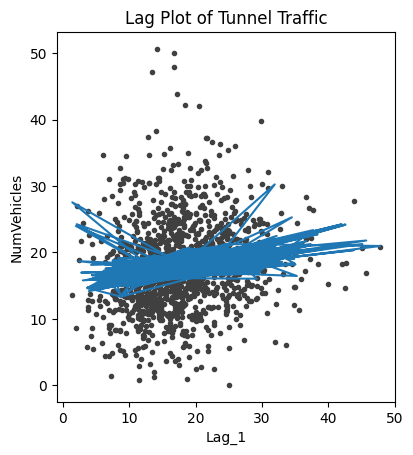

In [915]:
fig, ax = plt.subplots()
ax.plot(X_test['Lag_1'], y_test, '.', color='0.25')
ax.plot(X_test['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic');